<a href="https://colab.research.google.com/github/Sathyasr2004/Sathya-VRP-project/blob/main/VEHICLE_ROUTING_PROBLEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#SOLUTION
!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [63]:

num_locations = 11  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 2 # Define how many vehicles are available to visit the locations

In [64]:
creator.create("FitnessMin",base.Fitness,weights=(-1.0,-1.0) )
creator.create("Individual",list,fitness=creator.FitnessMin )

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [65]:
#TASK 4 - Starting with the toolbox and tools
import random
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) #finish defining how to build an individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual) #finish defining how to build an population)

In [67]:

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [68]:

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [69]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min      
0  	300   	346.504	0.0955066
1  	227   	331.472	0.170262 
2  	228   	322.979	0.12232  
3  	236   	316.107	0.107165 
4  	249   	316.417	0.120286 
5  	230   	309.599	0.0457436
6  	233   	306.552	0.293536 
7  	229   	302.097	0.293536 
8  	233   	299.659	0.0341676
9  	234   	294.296	0.147387 
10 	230   	293.495	0.0902306
11 	243   	287.977	0.317143 
12 	230   	284.759	0.0355137
13 	236   	281.112	0.0409386
14 	248   	264.286	0.371565 
15 	227   	252.362	0.317143 
16 	234   	255.3  	0.317143 
17 	237   	248.396	0.317143 
18 	223   	240.813	0.0971652
19 	229   	233.579	0.0971652
20 	245   	229.507	0.0971652
21 	238   	220.914	0.0971652
22 	228   	222.433	0.0971652
23 	233   	216.129	0.0971652
24 	223   	206.806	0.0971652
25 	221   	194.511	0.62206  
26 	227   	194.583	0.743322 
27 	231   	194.866	0.62206  
28 	237   	195.423	0.62206  
29 	218   	193.896	2.16016  
30 	238   	192.569	0.775325 
31 	229   	194.051	3.70138  
32 	233   	196.465	0.62206  
33 	214   	194

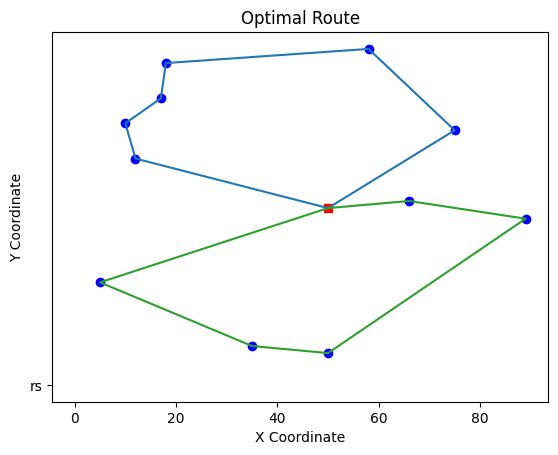

In [70]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()